# PGF5005 — Mecânica Clássica · Itens 4.7 e 4.8  
**Pêndulo simples — Euler simplético implementado e comparação com Euler convencional**

- **4.7**: implementação computacional do **Euler simplético (Euler–Cromer)** para o pêndulo simples adimensional.  
- **4.8**: repetir os gráficos do **4.3** $[q(t),p(t)]$ para **librar** e **rotacionar**, com $\Delta t=10^{-1},10^{-2},10^{-3}$, agora com **Euler simplético** e **comparar** com as curvas do **Euler convencional**.


## 1) Modelo do pêndulo e energia

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def dU_dq(q):
    """dU/dq para U(q) = -cos q -> sin q"""
    return math.sin(q)

def H(q, p):
    return 0.5*p*p - math.cos(q)


## 2) Integrador **Euler convencional** (referência para comparação)

In [2]:
def euler_conv_step(q, p, dt):
    # q^{n+1} = q^n + dt * p^n
    q_next = q + dt * p
    # p^{n+1} = p^n - dt * sin(q^n)
    p_next = p - dt * dU_dq(q)  # usa q^n
    return q_next, p_next

def integrar_euler_conv(q0, p0, dt, T):
    n = int(np.ceil(T/dt))
    t = np.empty(n+1); q = np.empty(n+1); p = np.empty(n+1); E = np.empty(n+1)
    t[0]=0.0; q[0]=q0; p[0]=p0; E[0]=H(q0,p0)
    for k in range(n):
        q[k+1], p[k+1] = euler_conv_step(q[k], p[k], dt)
        t[k+1]=(k+1)*dt
        E[k+1]=H(q[k+1], p[k+1])
    return t,q,p,E


## 3) **Euler simplético (Euler–Cromer)** — ítem **4.7**

$$
q^{n+1}=q^n+\Delta t\,p^n,\qquad
p^{n+1}=p^n-\Delta t\,\sin\!\big(q^{n+1}\big).
$$

In [3]:
def euler_symp_step(q, p, dt):
    q_next = q + dt * p               # usa p^n
    p_next = p - dt * dU_dq(q_next)   # usa q^{n+1}
    return q_next, p_next

def integrar_euler_symp(q0, p0, dt, T):
    n = int(np.ceil(T/dt))
    t = np.empty(n+1); q = np.empty(n+1); p = np.empty(n+1); E = np.empty(n+1)
    t[0]=0.0; q[0]=q0; p[0]=p0; E[0]=H(q0,p0)
    for k in range(n):
        q[k+1], p[k+1] = euler_symp_step(q[k], p[k], dt)
        t[k+1]=(k+1)*dt
        E[k+1]=H(q[k+1], p[k+1])
    return t,q,p,E


## 4) Funções auxiliares para o **4.8** (varrer três Δt e plotar)

In [4]:
def simular_tres_dts(integrador, q0, p0, T, dt_list):
    resultados = {}
    for dt in dt_list:
        resultados[dt] = integrador(q0, p0, dt, T)
    return resultados

def plot_comparacao(series_A, series_B, title, ylab):
    """Plota no mesmo gráfico as três curvas do método A e as três do método B.
    series_*: lista de tuplas (t, y, label).
    """
    plt.figure()
    for t,y,label in series_A:
        plt.plot(t,y,label=label, lw=1.2)
    for t,y,label in series_B:
        plt.plot(t,y,label=label, lw=1.2, linestyle='--')
    plt.xlabel('t')
    plt.ylabel(ylab)
    plt.title(title + '\n(linha cheia: simplético · tracejada: conv.)')
    plt.legend()
    plt.show()


## 5) Execução: **librar** e **rotacionar** para $\Delta t = 10^{-1},10^{-2},10^{-3}$

Comparamos **Euler simplético** (linhas cheias) vs **Euler convencional** (linhas tracejadas).


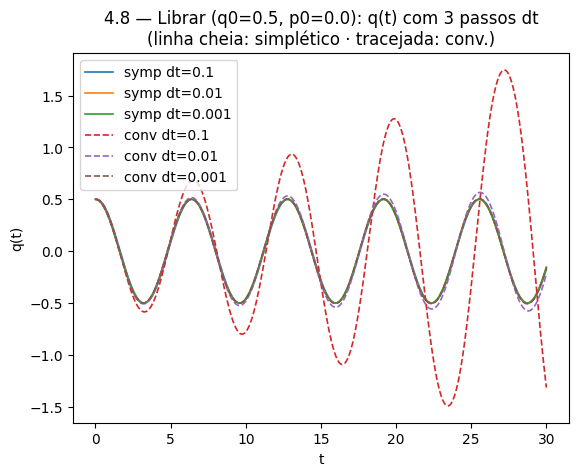

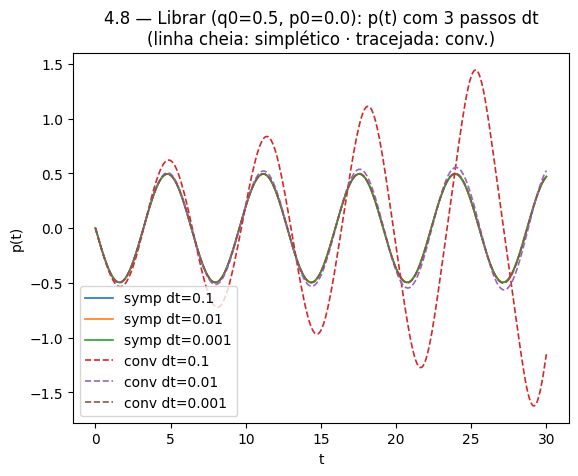

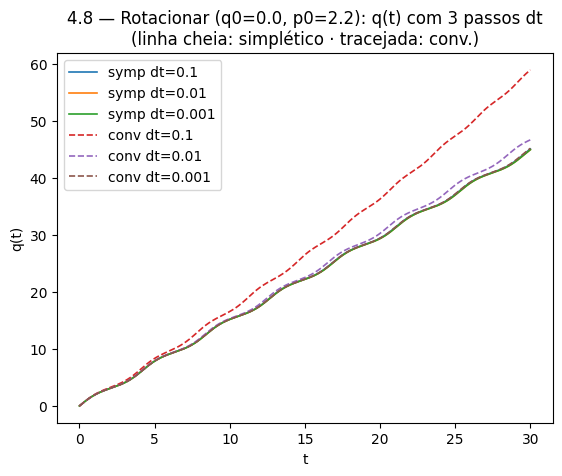

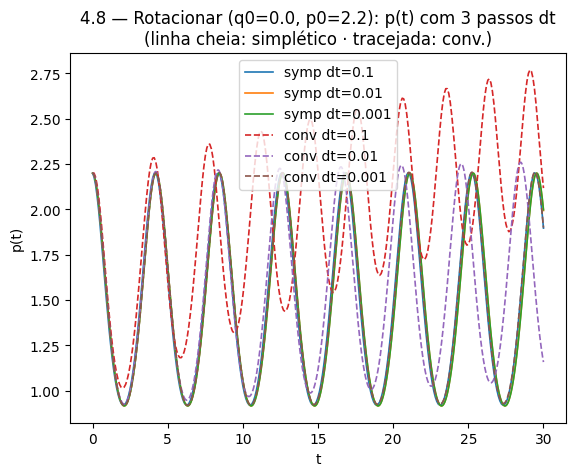

In [5]:
# parâmetros
dt_list = [1e-1, 1e-2, 1e-3]
T = 30.0

def rodar(q0, p0, nome):
    # simulações
    res_symp = simular_tres_dts(integrar_euler_symp, q0, p0, T, dt_list)
    res_conv = simular_tres_dts(integrar_euler_conv, q0, p0, T, dt_list)
    # séries para q(t)
    series_q_symp = [(t,q,f"symp dt={dt:g}") for dt,(t,q,p,E) in res_symp.items()]
    series_q_conv = [(t,q,f"conv dt={dt:g}") for dt,(t,q,p,E) in res_conv.items()]
    plot_comparacao(series_q_symp, series_q_conv, f"4.8 — {nome}: q(t) com 3 passos dt", "q(t)")
    # séries para p(t)
    series_p_symp = [(t,p,f"symp dt={dt:g}") for dt,(t,q,p,E) in res_symp.items()]
    series_p_conv = [(t,p,f"conv dt={dt:g}") for dt,(t,q,p,E) in res_conv.items()]
    plot_comparacao(series_p_symp, series_p_conv, f"4.8 — {nome}: p(t) com 3 passos dt", "p(t)")

# **Librar**
rodar(0.5, 0.0, "Librar (q0=0.5, p0=0.0)")
# **Rotacionar**
rodar(0.0, 2.2, "Rotacionar (q0=0.0, p0=2.2)")


---
## 6) Roteiro de comentários para o relatório (o que observar)

- **Euler simplético** apresenta **oscilação quase-conservada** de energia e trajetórias mais fiéis
  (sem *drift* sistemático), especialmente visível para $\Delta t=10^{-2},10^{-3}$.
- O **Euler convencional** tende a introduzir **deriva de energia** e distorções na fase para $\Delta t$ maiores,
  evidentes nas curvas de $q(t)$ e $p(t)$ comparadas às do simplético.
- Para **librar**, observe periodicidade estável no simplético vs. variação de amplitude no convencional.
- Para **rotacionar**, o simplético mantém o crescimento monótono de $q(t)$ e comportamento de $p(t)$ coerente; o convencional pode atrasar/adiantar a fase.

> Obs.: linhas **cheias** = Euler **simplético**; **tracejadas** = Euler **convencional**.
